# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

warnings.filterwarnings('ignore')
%matplotlib inline

## Load DataFrame

In [4]:
df = pd.read_csv('Food_and_Nutrition.csv')
df

,Ages,Gender,Height,Weight,Activity Level,Dietary Preference,Daily Calorie Target,Protein,Sugar,Sodium,Calories,Carbohydrates,Fiber,Fat,Breakfast Suggestion,Lunch Suggestion,Dinner Suggestion,Snack Suggestion,Disease
0,25,Male,180,80,Moderately Active,Omnivore,2000,120,125.0,24.0,2020,250,30.00,60,Oatmeal with berries and nuts,Grilled chicken salad with mixed greens,Salmon with roasted vegetables,Greek yogurt with fruit,Weight Gain
1,32,Female,165,65,Lightly Active,Vegetarian,1600,80,100.0,16.0,1480,200,24.00,40,Tofu scramble with veggies,Lentil soup with whole wheat bread,Vegetable stir-fry with brown rice,Apple with almond butter,"Weight Gain, Hypertension, Heart Disease"
2,48,Male,175,95,Sedentary,Vegan,2200,100,150.0,20.0,2185,300,36.00,65,Tofu and veggie breakfast burrito,Black bean burger on a whole wheat bun,Lentil and vegetable curry,Trail mix,Weight Gain
3,55,Female,160,70,Very Active,Omnivore,2500,140,175.0,28.0,2680,350,42.00,80,Greek yogurt with granola and fruit,Chicken and vegetable stir-fry,Turkey chili with brown rice,Banana with peanut butter,Weight Gain
4,62,Male,170,85,Sedentary,Vegetarian,2000,80,125.0,16.0,1815,250,30.00,55,Scrambled eggs with whole wheat toast and avocado,Quinoa salad with chickpeas and vegetables,Vegetarian chili with cornbread,Fruit and nut mix,Weight Gain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,53,Female,182,76,Sedentary,Vegan,1265,94,63.0,18.8,1258,126,15.12,42,Oatmeal with berries and nuts,Quinoa salad with chickpeas and vegetables,Vegetable stir-fry with brown rice,Apple with almond butter,"Diabetes, Acne, Weight Gain, Hypertension, Hea..."
1694,38,Male,150,76,Very Active,Vegan,2109,158,105.0,31.6,2102,210,25.20,70,Oatmeal with berries and nuts,Grilled chicken salad with mixed greens,Lentil and vegetable curry,Apple with almond butter,Weight Gain
1695,57,Male,165,73,Very Active,Vegan,2555,191,127.5,38.2,2549,255,30.60,85,Smoothie with protein powder,Chicken and vegetable stir-fry,Vegetable stir-fry with brown rice,Fruit and nut mix,Weight Gain
1696,40,Male,166,91,Extremely Active,Vegan,3329,249,166.0,49.8,3314,332,39.84,110,Scrambled eggs with whole wheat toast,Lentil soup with whole wheat bread,Vegetable stir-fry with brown rice,Banana with peanut butter,Weight Gain


## Check DataFrame

In [19]:
df.head()

,Ages,Gender,Height,Weight,Activity Level,Dietary Preference,Daily Calorie Target,Protein,Sugar,Sodium,Calories,Carbohydrates,Fiber,Fat,Breakfast Suggestion,Lunch Suggestion,Dinner Suggestion,Snack Suggestion,Disease
0,25,Male,180,80,Moderately Active,Omnivore,2000,120,125.0,24.0,2020,250,30.0,60,Oatmeal with berries and nuts,Grilled chicken salad with mixed greens,Salmon with roasted vegetables,Greek yogurt with fruit,Weight Gain
1,32,Female,165,65,Lightly Active,Vegetarian,1600,80,100.0,16.0,1480,200,24.0,40,Tofu scramble with veggies,Lentil soup with whole wheat bread,Vegetable stir-fry with brown rice,Apple with almond butter,"Weight Gain, Hypertension, Heart Disease"
2,48,Male,175,95,Sedentary,Vegan,2200,100,150.0,20.0,2185,300,36.0,65,Tofu and veggie breakfast burrito,Black bean burger on a whole wheat bun,Lentil and vegetable curry,Trail mix,Weight Gain
3,55,Female,160,70,Very Active,Omnivore,2500,140,175.0,28.0,2680,350,42.0,80,Greek yogurt with granola and fruit,Chicken and vegetable stir-fry,Turkey chili with brown rice,Banana with peanut butter,Weight Gain
4,62,Male,170,85,Sedentary,Vegetarian,2000,80,125.0,16.0,1815,250,30.0,55,Scrambled eggs with whole wheat toast and avocado,Quinoa salad with chickpeas and vegetables,Vegetarian chili with cornbread,Fruit and nut mix,Weight Gain


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ages                  1698 non-null   int64  
 1   Gender                1698 non-null   object 
 2   Height                1698 non-null   int64  
 3   Weight                1698 non-null   int64  
 4   Activity Level        1698 non-null   object 
 5   Dietary Preference    1698 non-null   object 
 6   Daily Calorie Target  1698 non-null   int64  
 7   Protein               1698 non-null   int64  
 8   Sugar                 1698 non-null   float64
 9   Sodium                1698 non-null   float64
 10  Calories              1698 non-null   int64  
 11  Carbohydrates         1698 non-null   int64  
 12  Fiber                 1698 non-null   float64
 13  Fat                   1698 non-null   int64  
 14  Breakfast Suggestion  1698 non-null   object 
 15  Lunch Suggestion     

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ages,1698.0,43.961720,15.915002,18.0,30.00,42.00,57.00,79.00
Height,1698.0,174.130153,13.420936,150.0,163.25,174.00,185.00,200.00
Weight,1698.0,78.064193,16.949264,48.0,64.00,78.00,91.00,119.00
Daily Calorie Target,1698.0,2275.171967,558.812405,1200.0,1800.00,2200.00,2689.00,4364.00
Protein,1698.0,139.898115,53.326588,50.0,100.00,136.00,174.00,327.00
Sugar,1698.0,126.192580,34.938902,60.0,100.00,124.00,150.00,218.00
Sodium,1698.0,27.979623,10.665318,10.0,20.00,27.20,34.80,65.40
Calories,1698.0,2196.440518,571.089569,990.0,1770.25,2146.00,2549.75,4357.00
Carbohydrates,1698.0,252.385159,69.877804,120.0,200.00,248.00,300.00,436.00
Fiber,1698.0,30.286219,8.385337,14.4,24.00,29.76,36.00,52.32


In [25]:
df.describe(include='object').T

,count,unique,top,freq
Gender,1698,2,Female,862
Activity Level,1698,5,Moderately Active,420
Dietary Preference,1698,4,Omnivore,564
Breakfast Suggestion,1698,121,Smoothie with protein powder,210
Lunch Suggestion,1698,190,Lentil soup with whole wheat bread,161
Dinner Suggestion,1698,177,Salmon with roasted vegetables,175
Snack Suggestion,1698,112,Trail mix,296
Disease,1698,13,Weight Gain,1312


In [49]:
df.isnull().sum()

Ages                    0
Gender                  0
Height                  0
Weight                  0
Activity Level          0
Dietary Preference      0
Daily Calorie Target    0
Protein                 0
Sugar                   0
Sodium                  0
Calories                0
Carbohydrates           0
Fiber                   0
Fat                     0
Breakfast Suggestion    0
Lunch Suggestion        0
Dinner Suggestion       0
Snack Suggestion        0
Disease                 0
dtype: int64

In [51]:
df.duplicated().sum()

0

In [53]:
df.columns

Index(['Ages', 'Gender', 'Height', 'Weight', 'Activity Level',
       'Dietary Preference', 'Daily Calorie Target', 'Protein', 'Sugar',
       'Sodium', 'Calories', 'Carbohydrates', 'Fiber', 'Fat',
       'Breakfast Suggestion', 'Lunch Suggestion', 'Dinner Suggestion',
       'Snack Suggestion', 'Disease'],
      dtype='object')

## Check Each Columns

### Ages

In [55]:
df['Ages'].head()

0    25
1    32
2    48
3    55
4    62
Name: Ages, dtype: int64

In [57]:
df['Ages'].nunique()

62

In [59]:
df['Ages'].unique()

array([25, 32, 48, 55, 62, 68, 28, 35, 42, 58, 40, 22, 24, 38, 45, 31, 21,
       30, 20, 72, 60, 65, 19, 52, 47, 70, 33, 27, 50, 23, 29, 77, 51, 53,
       79, 39, 74, 18, 59, 46, 34, 44, 56, 57, 61, 36, 63, 37, 41, 69, 26,
       78, 67, 75, 66, 73, 43, 49, 64, 71, 54, 76], dtype=int64)

In [61]:
df['Ages'].min()

18

In [63]:
df['Ages'].max()

79

### Height

In [65]:
df['Height'].head()

0    180
1    165
2    175
3    160
4    170
Name: Height, dtype: int64

In [67]:
df['Height'].nunique()

51

In [69]:
df['Height'].unique()

array([180, 165, 175, 160, 170, 155, 190, 185, 168, 172, 182, 178, 183,
       158, 162, 163, 161, 188, 196, 156, 169, 153, 194, 198, 184, 192,
       199, 164, 150, 177, 166, 179, 197, 152, 173, 171, 187, 167, 154,
       191, 189, 176, 157, 159, 193, 186, 181, 174, 151, 195, 200],
      dtype=int64)

In [71]:
df['Height'].min()

150

In [73]:
df['Height'].max()

200

### Weight

In [75]:
df['Weight'].head()

0    80
1    65
2    95
3    70
4    85
Name: Weight, dtype: int64

In [77]:
df['Weight'].nunique()

71

In [79]:
df['Weight'].unique()

array([ 80,  65,  95,  70,  85,  60, 100,  75, 110,  78,  90,  68,  55,
        50,  58,  98,  72,  88,  62,  82, 105,  48, 115, 106,  61, 101,
        96,  59,  53,  93, 112,  79,  97,  76,  54,  57, 111, 107,  92,
        86,  71, 104,  81,  64,  74, 113,  56, 117,  73, 119,  87,  52,
       116,  89,  77, 103, 108,  91, 102,  63,  83, 114,  84, 118,  94,
        67, 109,  66,  69,  51,  99], dtype=int64)

In [81]:
df['Weight'].min()

48

In [83]:
df['Weight'].max()

119

In [89]:
df

,Ages,Gender,Height,Weight,Activity Level,Dietary Preference,Daily Calorie Target,Protein,Sugar,Sodium,Calories,Carbohydrates,Fiber,Fat,Breakfast Suggestion,Lunch Suggestion,Dinner Suggestion,Snack Suggestion,Disease
0,25,Male,180,80,Moderately Active,Omnivore,2000,120,125.0,24.0,2020,250,30.00,60,Oatmeal with berries and nuts,Grilled chicken salad with mixed greens,Salmon with roasted vegetables,Greek yogurt with fruit,Weight Gain
1,32,Female,165,65,Lightly Active,Vegetarian,1600,80,100.0,16.0,1480,200,24.00,40,Tofu scramble with veggies,Lentil soup with whole wheat bread,Vegetable stir-fry with brown rice,Apple with almond butter,"Weight Gain, Hypertension, Heart Disease"
2,48,Male,175,95,Sedentary,Vegan,2200,100,150.0,20.0,2185,300,36.00,65,Tofu and veggie breakfast burrito,Black bean burger on a whole wheat bun,Lentil and vegetable curry,Trail mix,Weight Gain
3,55,Female,160,70,Very Active,Omnivore,2500,140,175.0,28.0,2680,350,42.00,80,Greek yogurt with granola and fruit,Chicken and vegetable stir-fry,Turkey chili with brown rice,Banana with peanut butter,Weight Gain
4,62,Male,170,85,Sedentary,Vegetarian,2000,80,125.0,16.0,1815,250,30.00,55,Scrambled eggs with whole wheat toast and avocado,Quinoa salad with chickpeas and vegetables,Vegetarian chili with cornbread,Fruit and nut mix,Weight Gain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,53,Female,182,76,Sedentary,Vegan,1265,94,63.0,18.8,1258,126,15.12,42,Oatmeal with berries and nuts,Quinoa salad with chickpeas and vegetables,Vegetable stir-fry with brown rice,Apple with almond butter,"Diabetes, Acne, Weight Gain, Hypertension, Hea..."
1694,38,Male,150,76,Very Active,Vegan,2109,158,105.0,31.6,2102,210,25.20,70,Oatmeal with berries and nuts,Grilled chicken salad with mixed greens,Lentil and vegetable curry,Apple with almond butter,Weight Gain
1695,57,Male,165,73,Very Active,Vegan,2555,191,127.5,38.2,2549,255,30.60,85,Smoothie with protein powder,Chicken and vegetable stir-fry,Vegetable stir-fry with brown rice,Fruit and nut mix,Weight Gain
1696,40,Male,166,91,Extremely Active,Vegan,3329,249,166.0,49.8,3314,332,39.84,110,Scrambled eggs with whole wheat toast,Lentil soup with whole wheat bread,Vegetable stir-fry with brown rice,Banana with peanut butter,Weight Gain


### Activity Level

In [85]:
df['Activity Level'].nunique()

5

In [87]:
df['Activity Level'].unique()

array(['Moderately Active', 'Lightly Active', 'Sedentary', 'Very Active',
       'Extremely Active'], dtype=object)

### Dietary Preference

In [91]:
df['Dietary Preference'].nunique()

4

In [93]:
df['Dietary Preference'].unique()

array(['Omnivore', 'Vegetarian', 'Vegan', 'Pescatarian'], dtype=object)

### Daily Calories Target

In [6]:
df['Daily Calorie Target'].head()

0    2000
1    1600
2    2200
3    2500
4    2000
Name: Daily Calorie Target, dtype: int64

In [8]:
df['Daily Calorie Target'].nunique()

895

In [10]:
df['Daily Calorie Target'].unique()

array([2000, 1600, 2200, 2500, 1800, 3000, 2400, 3200, 1900, 2800, 1400,
       1500, 1700, 2600, 2100, 2300, 3500, 1200, 2368, 2707, 1602, 1886,
       2846, 1802, 2275, 1954, 1636, 2619, 2912, 1508, 1766, 2286, 1616,
       2229, 1944, 1859, 2289, 2953, 1650, 2784, 2466, 2189, 2406, 1594,
       2336, 1922, 2754, 2243, 1569, 2702, 1696, 1846, 2262, 2482, 2786,
       2292, 2111, 2327, 2682, 1703, 2562, 1537, 2241, 2489, 2928, 2352,
       2383, 2611, 1599, 2123, 2104, 1604, 1656, 2016, 2174, 2061, 2415,
       2817, 2902, 1673, 1657, 2287, 2576, 2372, 2606, 1856, 2686, 2798,
       2925, 2826, 2180, 1839, 1817, 1598, 2764, 1806, 1567, 2704, 2158,
       1962, 2624, 2003, 2114, 1587, 2981, 1566, 2210, 2342, 2857, 2428,
       2150, 1975, 1847, 1974, 2749, 1549, 2640, 2237, 1644, 2014, 2248,
       1512, 2131, 2442, 1595, 2904, 2751, 1858, 2965, 2729, 2571, 2669,
       1699, 2985, 1738, 2235, 2805, 1560, 1842, 2294, 2876, 2874, 2135,
       1707, 2862, 1850, 2708, 1630, 2130, 2391, 24

In [12]:
df['Daily Calorie Target'].min()

1200

In [14]:
df['Daily Calorie Target'].max()

4364

### Protein

In [24]:
df['Protein'].head()

0    120
1     80
2    100
3    140
4     80
Name: Protein, dtype: int64

In [26]:
df['Protein'].unique()

array([120,  80, 100, 140,  70, 180, 160,  75, 150, 110,  65, 200,  55,
       130,  90, 170,  85,  60, 220,  95,  50, 125, 115, 175, 102, 144,
       174,  79, 161, 105, 166, 103,  76,  82,  68, 163, 173,  88, 141,
       132, 145, 178,  66, 146, 101,  96, 106,  83, 107,  51, 151, 133,
        84,  99, 128, 136, 171, 167,  89, 168,  59, 149, 108, 172, 131,
        63,  72, 127, 169, 116,  87,  74, 113, 152, 135,  61, 177,  53,
        77, 176,  73, 109,  52, 153, 117, 139,  62,  58,  78, 123, 147,
       114,  97,  94, 124,  54,  56, 158, 143, 126,  98, 112,  91, 156,
       118,  86, 129,  92, 154, 119,  67,  57,  64, 104, 148, 142, 138,
        93,  69, 121, 111, 164, 122, 155, 157, 134, 159,  71, 179, 165,
       137, 162, 187, 264, 228, 237, 274, 234, 205, 198, 236, 192, 270,
       184, 207, 206, 229, 204, 261, 186, 268, 217, 256, 302, 251, 233,
       189, 197, 263, 194, 327, 199, 269, 219, 231, 190, 257, 298, 221,
       213, 278, 225, 255, 224, 181, 203, 183, 239, 202, 249, 21

In [28]:
df['Protein'].nunique()

231

In [30]:
df['Protein'].min()

50

In [32]:
df['Protein'].max()

327

### Sugar

In [38]:
df['Sugar'].head()

0    125.0
1    100.0
2    150.0
3    175.0
4    125.0
Name: Sugar, dtype: float64

In [40]:
df['Sugar'].unique()

array([125. , 100. , 150. , 175. , 110. , 200. , 115. ,  90. , 140. ,
       160. , 120. ,  75. ,  95. , 135. ,  80. ,  85. , 130. , 190. ,
        65. , 105. ,  70. , 112.5, 137.5,  92.5,  60. ,  87.5, 187.5,
        97. , 165. ,  80.5, 158. , 176.5,  85.5,  99.5, 103.5, 173.5,
       189.5, 199.5, 157.5, 102.5, 186.5, 164. , 142.5, 153. ,  81. ,
       117. , 184. , 112. , 128.5, 105.5, 113.5, 181. , 114.5, 197.5,
       127.5,  88. , 162. , 181.5, 131.5, 155. , 194.5, 133.5, 157. ,
       154. ,  83. ,  99. , 185. , 163. , 132. , 135.5, 155.5,  93.5,
       119.5, 120.5, 170. ,  93. ,  76. ,  89. , 159. ,  79.5, 161.5,
       107. , 150.5, 113. , 126. , 122. , 103. , 110.5, 162.5, 183.5,
       152.5, 142. , 167. ,  94. , 144. , 146.5,  82.5, 160.5, 124. ,
        98.5, 195. , 166. ,  95.5, 185.5, 156.5,  91.5, 145. , 149.5,
       127. , 129.5,  96. , 139.5, 180. , 141.5,  97.5,  81.5, 198.5,
       173. , 182.5, 188.5, 174.5, 136.5, 133. , 137. , 172. , 171. ,
       184.5, 138.5,

In [42]:
df['Sugar'].nunique()

276

In [44]:
df['Sugar'].min()

60.0

In [46]:
df['Sugar'].max()

218.0

### Sodium

In [50]:
df['Sodium'].head()

0    24.0
1    16.0
2    20.0
3    28.0
4    16.0
Name: Sodium, dtype: float64

In [52]:
df['Sodium'].unique()

array([24. , 16. , 20. , 28. , 14. , 36. , 32. , 15. , 30. , 22. , 13. ,
       40. , 11. , 26. , 18. , 34. , 17. , 12. , 44. , 19. , 10. , 25. ,
       23. , 35. , 20.4, 28.8, 34.8, 15.8, 32.2, 21. , 33.2, 20.6, 15.2,
       16.4, 13.6, 32.6, 34.6, 17.6, 28.2, 26.4, 29. , 35.6, 13.2, 29.2,
       20.2, 19.2, 21.2, 16.6, 21.4, 10.2, 30.2, 26.6, 16.8, 19.8, 25.6,
       27.2, 34.2, 33.4, 17.8, 33.6, 11.8, 29.8, 21.6, 34.4, 26.2, 12.6,
       14.4, 25.4, 33.8, 23.2, 17.4, 14.8, 22.6, 30.4, 27. , 12.2, 35.4,
       10.6, 15.4, 35.2, 14.6, 21.8, 10.4, 30.6, 23.4, 27.8, 12.4, 11.6,
       15.6, 24.6, 29.4, 22.8, 19.4, 18.8, 24.8, 10.8, 11.2, 31.6, 28.6,
       25.2, 19.6, 22.4, 18.2, 31.2, 23.6, 17.2, 25.8, 18.4, 30.8, 23.8,
       13.4, 11.4, 12.8, 20.8, 29.6, 28.4, 27.6, 18.6, 13.8, 24.2, 22.2,
       32.8, 24.4, 31. , 31.4, 26.8, 31.8, 14.2, 35.8, 33. , 27.4, 32.4,
       37.4, 52.8, 45.6, 47.4, 54.8, 46.8, 41. , 39.6, 47.2, 38.4, 54. ,
       36.8, 41.4, 41.2, 45.8, 40.8, 52.2, 37.2, 53

In [54]:
df['Sodium'].nunique()

231

In [56]:
df['Sodium'].min()

10.0

In [58]:
df['Sodium'].max()

65.4

### Calories

In [60]:
df['Calories'].head()

0    2020
1    1480
2    2185
3    2680
4    1815
Name: Calories, dtype: int64

In [62]:
df['Calories'].unique()

array([2020, 1480, 2185, 2680, 1815, 1565, 2840, 2220, 3005, 1670, 2230,
       2520, 1650, 3100, 1940, 2850, 1400, 1850, 2760, 2140, 2470, 1890,
       1315, 3130, 1810, 1660, 2320, 1430, 2900, 1180, 2030, 1490, 1990,
       1780, 1740, 1770, 1570, 2065, 2810, 2640, 2395, 2355, 1945, 1730,
       2390, 1320, 1530, 1830, 3010, 1410, 2270, 2060, 2110, 2400, 2940,
       3050, 2310, 1280, 2720, 2920, 1550, 2190, 2340, 1610, 2045, 2100,
       2150, 1640, 2350, 1190, 2300, 1860, 1240, 1545, 2475, 1380, 2930,
       1405, 2430, 1115, 1655, 2560, 1900, 1260, 2690, 1820, 1360, 2070,
       1690, 1805, 1825, 3390, 1930, 2770, 1450, 1200, 2650, 1345, 1950,
       1150, 1775, 3140, 1870, 2120, 1120, 2040, 1710, 1855, 2910, 2250,
       2550, 1980, 3220, 2730, 2890, 1385, 1675, 1325, 1575, 1620, 3210,
       3300, 1070, 1305, 2440, 2480, 3020, 1370, 2860, 3320, 2820, 1440,
       3040, 1630,  990, 1340, 1300, 1445, 2805, 2610, 1485, 3290, 1832,
       1925, 2156, 2902, 1455, 2162, 1717, 2460, 22

In [64]:
df['Calories'].nunique()

759

In [66]:
df['Calories'].min()

990

In [68]:
df['Calories'].max()

4357

### Carbohydrates

In [71]:
df['Carbohydrates'].head()

0    250
1    200
2    300
3    350
4    250
Name: Carbohydrates, dtype: int64

In [73]:
df['Carbohydrates'].unique()

array([250, 200, 300, 350, 220, 400, 230, 180, 280, 320, 240, 150, 190,
       270, 160, 170, 260, 380, 130, 210, 140, 225, 275, 185, 120, 175,
       375, 194, 330, 161, 316, 353, 171, 199, 207, 347, 379, 399, 315,
       205, 373, 328, 285, 306, 162, 234, 368, 224, 257, 211, 227, 362,
       229, 395, 255, 176, 324, 363, 263, 310, 389, 267, 314, 308, 166,
       198, 370, 326, 264, 271, 311, 187, 239, 241, 340, 186, 152, 178,
       318, 159, 323, 214, 301, 226, 252, 244, 206, 221, 325, 367, 305,
       284, 334, 188, 288, 293, 165, 321, 248, 197, 390, 332, 191, 371,
       313, 183, 290, 299, 254, 259, 192, 279, 360, 283, 195, 163, 397,
       346, 365, 377, 349, 273, 266, 274, 344, 342, 369, 277, 196, 157,
       374, 236, 237, 204, 167, 289, 387, 276, 258, 233, 378, 329, 245,
       296, 281, 398, 381, 361, 393, 336, 354, 394, 376, 261, 172, 384,
       396, 151, 272, 278, 366, 174, 312, 372, 359, 391, 158, 385, 173,
       304, 341, 213, 177, 203, 357, 156, 219, 217, 287, 307, 24

In [75]:
df['Carbohydrates'].nunique()

276

In [77]:
df['Carbohydrates'].min()

120

In [79]:
df['Carbohydrates'].max()

436

### Fibre

In [82]:
df['Fiber'].head()

0    30.0
1    24.0
2    36.0
3    42.0
4    30.0
Name: Fiber, dtype: float64

In [84]:
df['Fiber'].unique()

array([30.  , 24.  , 36.  , 42.  , 26.4 , 48.  , 27.6 , 21.6 , 33.6 ,
       38.4 , 28.8 , 18.  , 22.8 , 32.4 , 19.2 , 20.4 , 31.2 , 45.6 ,
       15.6 , 25.2 , 16.8 , 27.  , 33.  , 22.2 , 14.4 , 21.  , 45.  ,
       23.28, 39.6 , 19.32, 37.92, 42.36, 20.52, 23.88, 24.84, 41.64,
       45.48, 47.88, 37.8 , 24.6 , 44.76, 39.36, 34.2 , 36.72, 19.44,
       28.08, 44.16, 26.88, 30.84, 25.32, 27.24, 43.44, 27.48, 47.4 ,
       30.6 , 21.12, 38.88, 43.56, 31.56, 37.2 , 46.68, 32.04, 37.68,
       36.96, 19.92, 23.76, 44.4 , 39.12, 31.68, 32.52, 37.32, 22.44,
       28.68, 28.92, 40.8 , 22.32, 18.24, 21.36, 38.16, 19.08, 38.76,
       25.68, 36.12, 27.12, 30.24, 29.28, 24.72, 26.52, 39.  , 44.04,
       36.6 , 34.08, 40.08, 22.56, 34.56, 35.16, 19.8 , 38.52, 29.76,
       23.64, 46.8 , 39.84, 22.92, 44.52, 37.56, 21.96, 34.8 , 35.88,
       30.48, 31.08, 23.04, 33.48, 43.2 , 33.96, 23.4 , 19.56, 47.64,
       41.52, 43.8 , 45.24, 41.88, 32.76, 31.92, 32.88, 41.28, 41.04,
       44.28, 33.24,

In [86]:
df['Fiber'].nunique()

276

In [88]:
df['Fiber'].min()

14.4

In [90]:
df['Fiber'].max()

52.32

### Fat

In [93]:
df['Fat'].head()

0    60
1    40
2    65
3    80
4    55
Name: Fat, dtype: int64

In [95]:
df['Fat'].unique()

array([ 60,  40,  65,  80,  55,  45,  85,  50,  70, 100,  90,  35,  75,
        30, 110, 120,  72,  96,  64,  94,  39,  78,  53,  84,  48,  56,
        99,  44,  34,  62,  82,  37,  74,  79,  54,  59,  69,  57,  42,
        81,  89,  67,  31,  98,  73,  93,  58,  38,  33,  52,  41,  36,
        61,  91,  46,  95,  66,  97,  51,  76,  86,  47,  88,  71,  92,
        32,  49,  87,  77,  63,  83,  68,  43, 117, 101, 105, 121, 104,
       102, 116, 119, 113, 134, 111, 103, 145, 114, 132, 123, 106, 135,
       112, 115, 108, 107, 143, 109, 125, 128, 124, 118, 122, 126],
      dtype=int64)

In [97]:
df['Fat'].nunique()

103

In [99]:
df['Fat'].min()

30

In [101]:
df['Fat'].max()

145

In [104]:
df

,Ages,Gender,Height,Weight,Activity Level,Dietary Preference,Daily Calorie Target,Protein,Sugar,Sodium,Calories,Carbohydrates,Fiber,Fat,Breakfast Suggestion,Lunch Suggestion,Dinner Suggestion,Snack Suggestion,Disease
0,25,Male,180,80,Moderately Active,Omnivore,2000,120,125.0,24.0,2020,250,30.00,60,Oatmeal with berries and nuts,Grilled chicken salad with mixed greens,Salmon with roasted vegetables,Greek yogurt with fruit,Weight Gain
1,32,Female,165,65,Lightly Active,Vegetarian,1600,80,100.0,16.0,1480,200,24.00,40,Tofu scramble with veggies,Lentil soup with whole wheat bread,Vegetable stir-fry with brown rice,Apple with almond butter,"Weight Gain, Hypertension, Heart Disease"
2,48,Male,175,95,Sedentary,Vegan,2200,100,150.0,20.0,2185,300,36.00,65,Tofu and veggie breakfast burrito,Black bean burger on a whole wheat bun,Lentil and vegetable curry,Trail mix,Weight Gain
3,55,Female,160,70,Very Active,Omnivore,2500,140,175.0,28.0,2680,350,42.00,80,Greek yogurt with granola and fruit,Chicken and vegetable stir-fry,Turkey chili with brown rice,Banana with peanut butter,Weight Gain
4,62,Male,170,85,Sedentary,Vegetarian,2000,80,125.0,16.0,1815,250,30.00,55,Scrambled eggs with whole wheat toast and avocado,Quinoa salad with chickpeas and vegetables,Vegetarian chili with cornbread,Fruit and nut mix,Weight Gain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,53,Female,182,76,Sedentary,Vegan,1265,94,63.0,18.8,1258,126,15.12,42,Oatmeal with berries and nuts,Quinoa salad with chickpeas and vegetables,Vegetable stir-fry with brown rice,Apple with almond butter,"Diabetes, Acne, Weight Gain, Hypertension, Hea..."
1694,38,Male,150,76,Very Active,Vegan,2109,158,105.0,31.6,2102,210,25.20,70,Oatmeal with berries and nuts,Grilled chicken salad with mixed greens,Lentil and vegetable curry,Apple with almond butter,Weight Gain
1695,57,Male,165,73,Very Active,Vegan,2555,191,127.5,38.2,2549,255,30.60,85,Smoothie with protein powder,Chicken and vegetable stir-fry,Vegetable stir-fry with brown rice,Fruit and nut mix,Weight Gain
1696,40,Male,166,91,Extremely Active,Vegan,3329,249,166.0,49.8,3314,332,39.84,110,Scrambled eggs with whole wheat toast,Lentil soup with whole wheat bread,Vegetable stir-fry with brown rice,Banana with peanut butter,Weight Gain


### Breakfast Suggestion

In [110]:
df['Breakfast Suggestion'].unique()

array(['Oatmeal with berries and nuts', 'Tofu scramble with veggies',
       'Tofu and veggie breakfast burrito',
       'Greek yogurt with granola and fruit',
       'Scrambled eggs with whole wheat toast and avocado',
       'Protein pancakes with fruit and nuts',
       'Tofu and chickpea scramble',
       'Overnight oats with fruit and chia seeds',
       'Tofu scramble with vegetables', 'Wholegrain toast with avocado',
       'Greek yogurt with granola', 'Tofu and vegetable stir-fry',
       'Oatmeal with protein powder and fruit',
       'Eggs with wholegrain toast',
       'Greek yogurt with berries and granola',
       'Eggs with whole wheat toast and avocado',
       'Tofu scramble with vegetables and avocado',
       'Greek yogurt with fruit and granola',
       'Tofu scramble with spinach and avocado',
       'Scrambled eggs with whole wheat toast and fruit',
       'Oatmeal with berries and plant-based milk',
       'Oatmeal with fruit and nuts',
       'Tofu scramble with 

In [112]:
df['Breakfast Suggestion'].nunique()

121

### Lunch Suggestion

In [114]:
df['Lunch Suggestion'].unique()

array(['Grilled chicken salad with mixed greens',
       'Lentil soup with whole wheat bread',
       'Black bean burger on a whole wheat bun',
       'Chicken and vegetable stir-fry',
       'Quinoa salad with chickpeas and vegetables',
       'Lentil pasta with vegetables',
       'Chicken breast with brown rice and vegetables',
       'Lentil burger with sweet potato fries',
       'Lentil soup with wholegrain bread', 'Black bean salad',
       'Tuna salad sandwich on wholegrain bread',
       'Lentil and vegetable stew',
       'Black bean burger on a wholegrain bun',
       'Grilled chicken breast with brown rice',
       'Chicken breast with brown rice',
       'Salmon salad with mixed greens and avocado',
       'Chicken breast with sweet potato and broccoli',
       'Turkey sandwich on whole wheat bread with vegetables',
       'Vegan lentil stew with whole wheat bread',
       'Tuna salad with whole wheat bread',
       'Lentil and vegetable curry with brown rice',
       'Tun

In [116]:
df['Lunch Suggestion'].nunique()

190

### Dinner Suggestion

In [119]:
df['Dinner Suggestion'].unique()

array(['Salmon with roasted vegetables',
       'Vegetable stir-fry with brown rice', 'Lentil and vegetable curry',
       'Turkey chili with brown rice', 'Vegetarian chili with cornbread',
       'Vegan stir-fry with brown rice',
       'Steak with sweet potato and broccoli',
       'Quinoa and vegetable bowl', 'Vegan chili with cornbread',
       'Vegan pasta with vegetables and sauce',
       'Chickpea and vegetable curry', 'Vegetable stir-fry with tofu',
       'Chicken breast with steamed vegetables', 'Vegan chili',
       'Lentil pasta with vegetables', 'Steak with roasted vegetables',
       'Chicken stir-fry with brown rice',
       'Vegetarian chili with brown rice',
       'Chicken and vegetable stir-fry with brown rice',
       'Tofu stir-fry with brown rice and vegetables',
       'Chicken breast with sweet potato and green beans',
       'Vegan pasta with vegetables and tomato sauce',
       'Black bean burgers with sweet potato fries',
       'Tofu stir-fry with brown ric

In [121]:
df['Dinner Suggestion'].nunique()

177

### Snack Suggestion

In [124]:
df['Snack Suggestion'].unique()

array(['Greek yogurt with fruit', 'Apple with almond butter', 'Trail mix',
       'Banana with peanut butter', 'Fruit and nut mix',
       'Hummus and veggie wrap', 'Protein shake',
       'Cottage cheese with fruit', 'Energy bar',
       'Fruit and veggie sticks', 'Trail mix with nuts and seeds',
       'Fruit salad with yogurt', 'Popcorn',
       'Smoothie with protein powder', 'Fruit and nuts', 'Protein bar',
       'Apple with peanut butter', 'Trail mix with nuts and dried fruit',
       'Greek yogurt with fruit and granola', 'Banana with almond butter',
       'Mixed nuts and seeds', 'Apple slices with peanut butter',
       'Fruit smoothie', 'Apple slices with almond butter',
       'Fruit and cheese', 'Fruit and yogurt', 'Fruit salad with nuts',
       'Protein shake with banana', 'Energy bar with nuts and seeds',
       'Smoothie with protein powder and fruit', 'Mixed nuts',
       'Greek yogurt with nuts and seeds',
       'Trail mix with almonds and dried fruit',
       'Frui

In [126]:
df['Snack Suggestion'].nunique()

112

### Disease

In [129]:
df['Disease'].unique()

array(['Weight Gain', 'Weight Gain, Hypertension, Heart Disease',
       'Weight Gain, Hypertension, Heart Disease, Kidney Disease',
       'Weight Gain, Kidney Disease',
       'Hypertension, Heart Disease, Kidney Disease',
       'Diabetes, Acne, Weight Gain, Hypertension, Heart Disease, Kidney Disease',
       'Diabetes, Acne, Hypertension, Kidney Disease',
       'Hypertension, Kidney Disease',
       'Diabetes, Acne, Weight Loss, Hypertension, Heart Disease, Kidney Disease',
       'Hypertension, Heart Disease', 'Kidney Disease',
       'Diabetes, Acne, Weight Gain, Hypertension, Heart Disease',
       'Diabetes, Acne, Hypertension, Heart Disease'], dtype=object)

In [131]:
df['Disease'].nunique()

13

In [135]:
df

,Ages,Gender,Height,Weight,Activity Level,Dietary Preference,Daily Calorie Target,Protein,Sugar,Sodium,Calories,Carbohydrates,Fiber,Fat,Breakfast Suggestion,Lunch Suggestion,Dinner Suggestion,Snack Suggestion,Disease
0,25,Male,180,80,Moderately Active,Omnivore,2000,120,125.0,24.0,2020,250,30.00,60,Oatmeal with berries and nuts,Grilled chicken salad with mixed greens,Salmon with roasted vegetables,Greek yogurt with fruit,Weight Gain
1,32,Female,165,65,Lightly Active,Vegetarian,1600,80,100.0,16.0,1480,200,24.00,40,Tofu scramble with veggies,Lentil soup with whole wheat bread,Vegetable stir-fry with brown rice,Apple with almond butter,"Weight Gain, Hypertension, Heart Disease"
2,48,Male,175,95,Sedentary,Vegan,2200,100,150.0,20.0,2185,300,36.00,65,Tofu and veggie breakfast burrito,Black bean burger on a whole wheat bun,Lentil and vegetable curry,Trail mix,Weight Gain
3,55,Female,160,70,Very Active,Omnivore,2500,140,175.0,28.0,2680,350,42.00,80,Greek yogurt with granola and fruit,Chicken and vegetable stir-fry,Turkey chili with brown rice,Banana with peanut butter,Weight Gain
4,62,Male,170,85,Sedentary,Vegetarian,2000,80,125.0,16.0,1815,250,30.00,55,Scrambled eggs with whole wheat toast and avocado,Quinoa salad with chickpeas and vegetables,Vegetarian chili with cornbread,Fruit and nut mix,Weight Gain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,53,Female,182,76,Sedentary,Vegan,1265,94,63.0,18.8,1258,126,15.12,42,Oatmeal with berries and nuts,Quinoa salad with chickpeas and vegetables,Vegetable stir-fry with brown rice,Apple with almond butter,"Diabetes, Acne, Weight Gain, Hypertension, Hea..."
1694,38,Male,150,76,Very Active,Vegan,2109,158,105.0,31.6,2102,210,25.20,70,Oatmeal with berries and nuts,Grilled chicken salad with mixed greens,Lentil and vegetable curry,Apple with almond butter,Weight Gain
1695,57,Male,165,73,Very Active,Vegan,2555,191,127.5,38.2,2549,255,30.60,85,Smoothie with protein powder,Chicken and vegetable stir-fry,Vegetable stir-fry with brown rice,Fruit and nut mix,Weight Gain
1696,40,Male,166,91,Extremely Active,Vegan,3329,249,166.0,49.8,3314,332,39.84,110,Scrambled eggs with whole wheat toast,Lentil soup with whole wheat bread,Vegetable stir-fry with brown rice,Banana with peanut butter,Weight Gain


## Visualizations

### Distribution By Ages

In [183]:
df_age_count = df['Ages'].value_counts()
df_age_count = df_age_count.sort_values()

df_age_count = df_age_count.reset_index()
df_age_count.sort_values(by='Ages')

,Ages,count
10,18,14
34,19,25
9,20,14
55,21,51
54,22,50
...,...,...
6,75,9
2,76,4
5,77,8
3,78,5


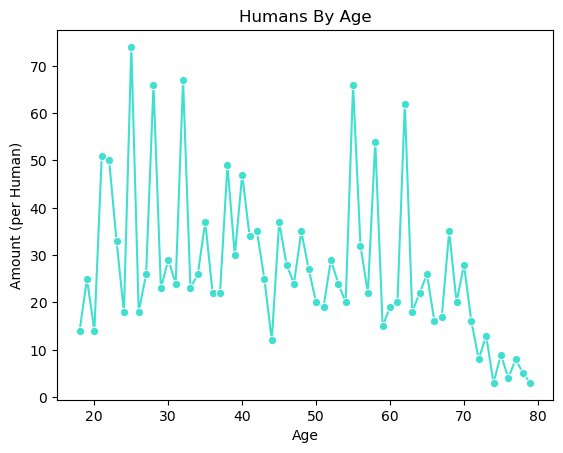

In [185]:
sns.lineplot(data=df_age_count, x='Ages', y='count', marker='o', color='turquoise')
plt.title('Humans By Age')
plt.xlabel('Age')
plt.ylabel('Amount (per Human)')
plt.show()

### Distribution By Gender

In [187]:
df_gender_count = df['Gender'].value_counts()
df_gender_count


Gender
Female    862
Male      836
Name: count, dtype: int64

#### Pie Chart

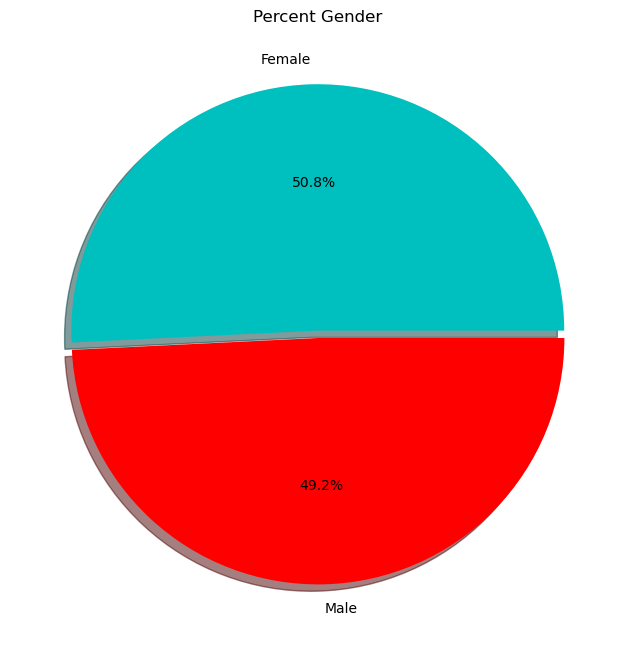

In [216]:
plt.figure(figsize=(12,8))
plt.pie(df_gender_count, labels=df_gender_count.index, colors='crimson', autopct='%1.1f%%', explode=[0.03, 0], shadow=True)
plt.title('Percent Gender')
plt.show()

### Distribution By Height

In [219]:
df_height_count = df['Height'].value_counts()
df_height_count = df_height_count.reset_index().sort_values(by='Height')
df_height_count.head()

,Height,count
45,150,19
32,151,24
15,152,30
14,153,31
36,154,22


#### Barplot

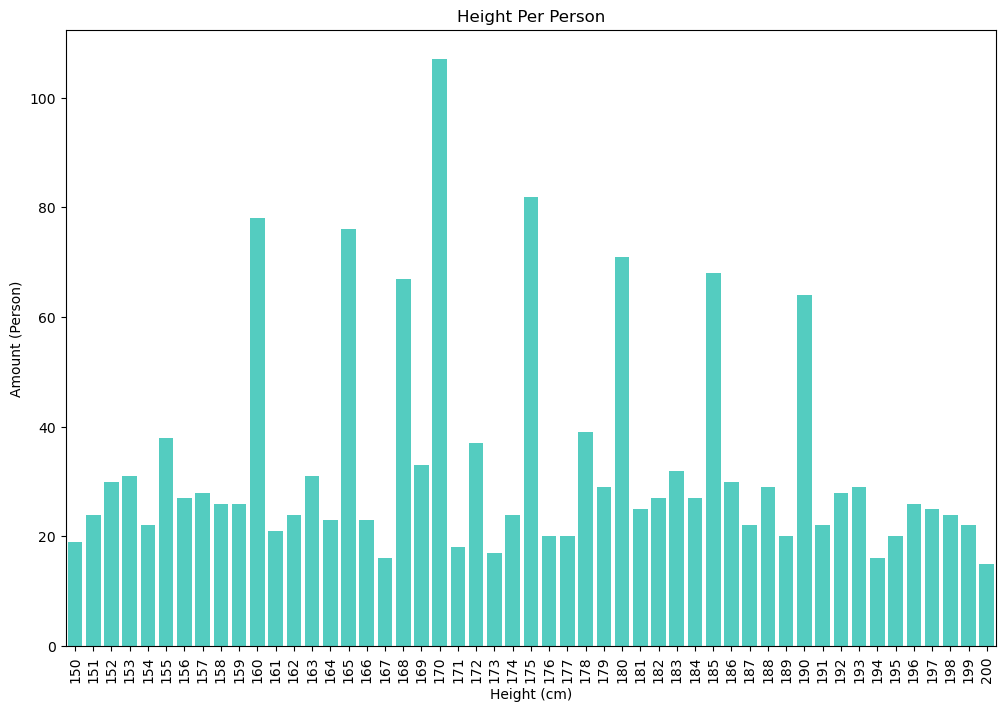

In [222]:
plt.figure(figsize=(12,8))
sns.barplot(data=df_height_count, x='Height', y='count', color='turquoise')
plt.xticks(rotation=90)
plt.title('Height Per Person')
plt.xlabel('Height (cm)')
plt.ylabel('Amount (Person)')
plt.show()

#### Boxplot

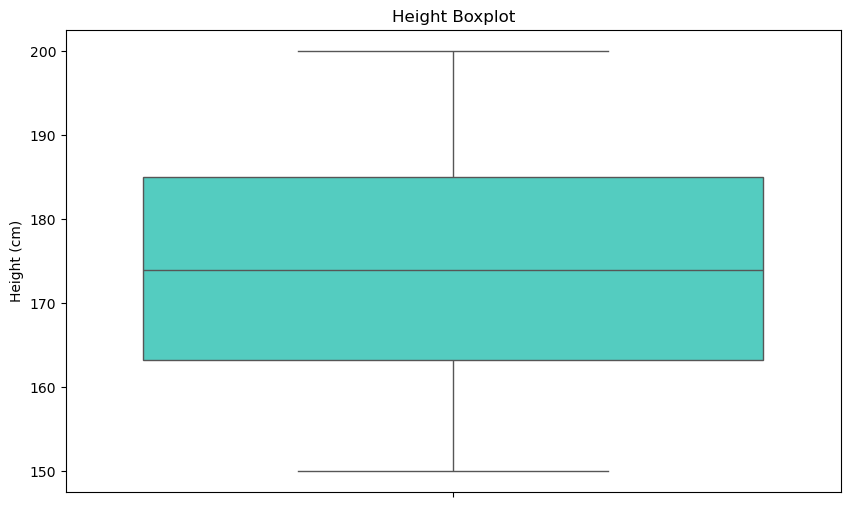

In [231]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df['Height'], color='turquoise')
plt.title('Height Boxplot')
plt.ylabel('Height (cm)')
plt.show()

### Distribution By Weight

In [234]:
df_weight_count = df['Weight'].value_counts()
df_weight_count = df_weight_count.reset_index().sort_values(by='Weight')
df_weight_count.head()

,Weight,count
70,48,1
11,50,36
42,51,17
16,52,27
40,53,19


#### Barplot

<Figure size 1200x800 with 0 Axes>

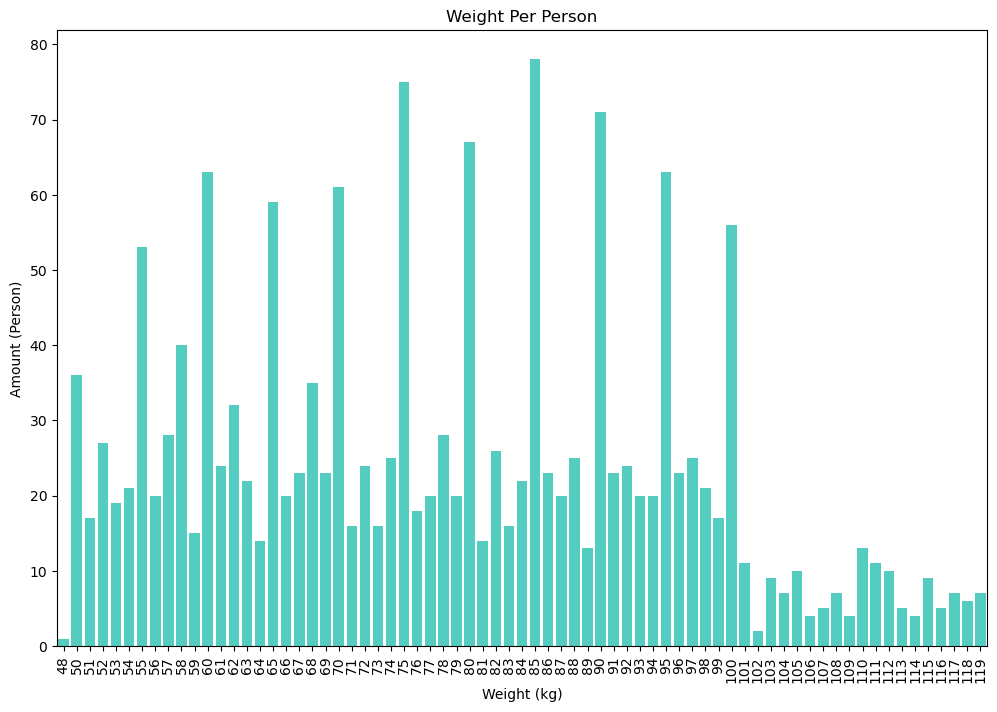

In [239]:
plt.figure(figsize=(12,8))
sns.barplot(data=df_weight_count, x='Weight', y='count', color='turquoise')
plt.xticks(rotation=90)
plt.title('Weight Per Person')
plt.xlabel('Weight (kg)')
plt.ylabel('Amount (Person)')
plt.show()

#### Boxplot

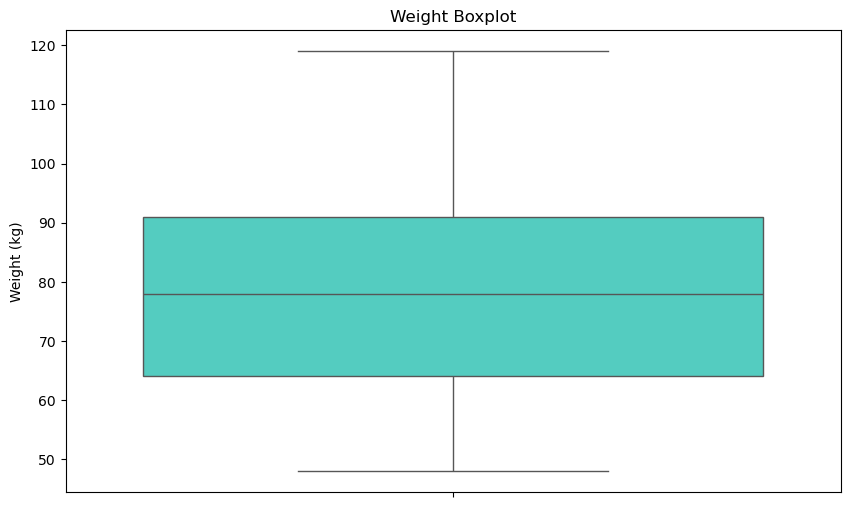

In [242]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df['Weight'], color='turquoise')
plt.title('Weight Boxplot')
plt.ylabel('Weight (kg)')
plt.show()

### Distribution By Activity Level

In [245]:
df_act_level = df['Activity Level'].value_counts()
df_act_level.head()

Activity Level
Moderately Active    420
Sedentary            403
Lightly Active       396
Very Active          341
Extremely Active     138
Name: count, dtype: int64

#### Pie Chart

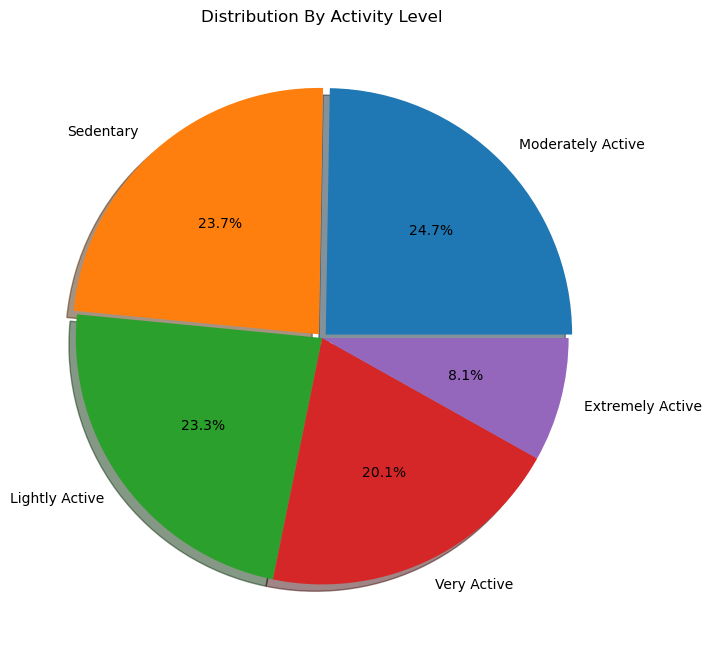

In [254]:
plt.figure(figsize=(12,8))
plt.pie(df_act_level, labels=df_act_level.index, autopct='%1.1f%%', explode=[0.02, 0.02, 0, 0, 0], shadow=True)
plt.title('Distribution By Activity Level')
plt.show()

### Distribution By Dietary Preference

In [258]:
df_diet_pref_count = df['Dietary Preference'].value_counts()
df_diet_pref_count.head()

Dietary Preference
Omnivore       564
Vegan          546
Vegetarian     448
Pescatarian    140
Name: count, dtype: int64

#### Pie Chart

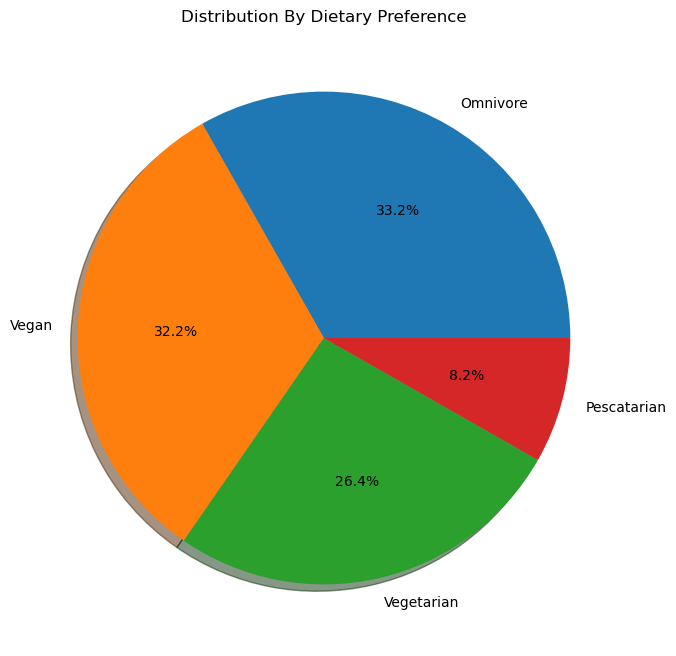

In [263]:
plt.figure(figsize=(12,8))
plt.pie(df_diet_pref_count, labels=df_diet_pref_count.index, autopct='%1.1f%%', shadow=True)
plt.title('Distribution By Dietary Preference')
plt.show()

### Distribution By Daily Calories

In [266]:
df_daily_cal = df['Daily Calorie Target'].value_counts()
df_daily_cal.head()

Daily Calorie Target
1800    91
2000    68
2200    61
1600    42
2500    36
Name: count, dtype: int64

#### Boxplot

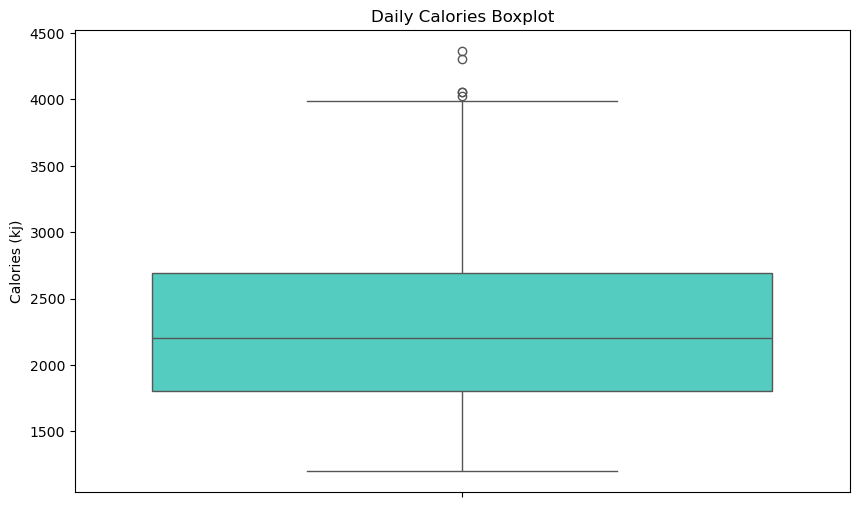

In [269]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df['Daily Calorie Target'], color='turquoise')
plt.title('Daily Calories Boxplot')
plt.ylabel('Calories (kj)')
plt.show()